## Build a predictive model to predict employees who are more likely to leave using the 'final_data' created in the Task 3a.
* For this below task using statsmodels package (don't use sklearn).


* You are required to predict attrition (target variable), and the other variables as X variables (whichever variables are applicable)


In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Bahroz Kalam\Desktop\Python\PYTHON CASE STUDY/final_data.csv'
data = pd.read_csv(r'C:\Users\Bahroz Kalam\Desktop\Python\PYTHON CASE STUDY\final_data.csv')

# Display the first few rows and summary of the dataset
data.head(), data.info(), data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   employeenumber                    1470 non-null   int64  
 1   age                               1466 non-null   float64
 2   education                         1465 non-null   object 
 3   educationfield                    1462 non-null   object 
 4   gender                            1467 non-null   object 
 5   maritalstatus                     1467 non-null   object 
 6   over18                            1464 non-null   object 
 7   department                        1470 non-null   object 
 8   businesstravel                    1470 non-null   object 
 9   distancefromhome                  1470 non-null   int64  
 10  jobinvolvement_x                  1469 non-null   object 
 11  joblevel                          1469 non-null   float64
 12  jobrol

(   employeenumber   age      education educationfield  gender maritalstatus  \
 0               1  41.0        College  Life Sciences  Female        Single   
 1               2  49.0  Below College  Life Sciences    Male       Married   
 2               4  37.0        College          Other    Male        Single   
 3               5  33.0         Master  Life Sciences  Female       Married   
 4               7  27.0  Below College        Medical    Male       Married   
 
   over18              department     businesstravel  distancefromhome  ...  \
 0      Y                   Sales      Travel_Rarely                 1  ...   
 1      Y  Research & Development  Travel_Frequently                 8  ...   
 2      Y  Research & Development      Travel_Rarely                 2  ...   
 3      Y  Research & Development  Travel_Frequently                 3  ...   
 4      Y  Research & Development      Travel_Rarely                 2  ...   
 
   yearsatcompany  yearsincurrentrole year

### a. Required to Perform data auditing, data cleaning, data processing, feature selection (key factors influencing attrition) etc

In [3]:
# Handling missing values
# For numerical columns, we can use the mean to fill missing values
# For categorical columns, we can use the mode to fill missing values

# Define numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill missing values
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Verify that there are no missing values left
missing_values = data.isnull().sum()

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verify the changes
missing_values, data_encoded.head()


(employeenumber                      0
 age                                 0
 education                           0
 educationfield                      0
 gender                              0
 maritalstatus                       0
 over18                              0
 department                          0
 businesstravel                      0
 distancefromhome                    0
 jobinvolvement_x                    0
 joblevel                            0
 jobrole                             0
 monthlysalary                       0
 numcompaniesworked                  0
 overtime                            0
 percentsalaryhike_last_year         0
 performancerating                   0
 stockoptionlevel                    0
 trainingtimeslastyear               0
 yearsatcompany                      0
 yearsincurrentrole                  0
 yearssincelastpromotion             0
 yearswithcurrmanager                0
 environmentsatisfaction             0
 jobinvolvement_y        

## b. Split the final_data  into train & test (70%:30%)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature matrix X and the target vector y
X = data_encoded.drop(columns=['attrition_Yes', 'employeenumber'])
y = data_encoded['attrition_Yes']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




## c. Build the binary classification model

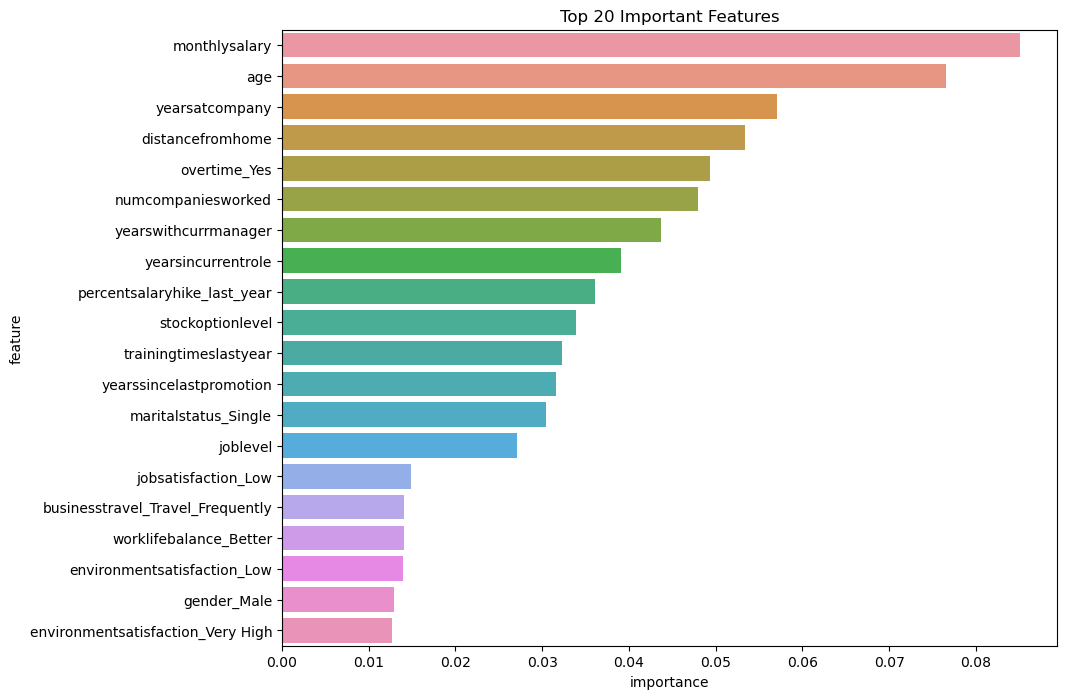

,feature,importance
3,monthlysalary,0.085077
0,age,0.076567
8,yearsatcompany,0.057031
1,distancefromhome,0.053410
39,overtime_Yes,0.049370
4,numcompaniesworked,0.047906
11,yearswithcurrmanager,0.043731
9,yearsincurrentrole,0.039078
5,percentsalaryhike_last_year,0.036082
6,stockoptionlevel,0.033881


In [11]:
# Use RandomForestClassifier to identify important features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances and their corresponding feature names
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df.head(20))
plt.title('Top 20 Important Features')
plt.show()

feature_importances_df.head(20)

## d. Calculate goodness of fit metrics like Confusion metrics, Classification report (accuracy, recall, precision, f1score), ROC_AUC score etc. on both train & test data.

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Classification Report (includes Precision, Recall, F1-Score)
classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Output the results
print("Confusion Matrix for Training Data:\n", conf_matrix_train)
print("Confusion Matrix for Test Data:\n", conf_matrix_test)
print(f"\nTraining Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")
print("\nClassification Report for Training Data:\n", classification_report_train)
print("\nClassification Report for Test Data:\n", classification_report_test)


Confusion Matrix for Training Data:
 [[853   0]
 [  0 176]]
Confusion Matrix for Test Data:
 [[376   4]
 [ 56   5]]

Training Accuracy: 1.0
Test Accuracy: 0.8639455782312925

Classification Report for Training Data:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       853
        True       1.00      1.00      1.00       176

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029


Classification Report for Test Data:
               precision    recall  f1-score   support

       False       0.87      0.99      0.93       380
        True       0.56      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.53       441
weighted avg       0.83      0.86      0.82       441



## ROC_AUC score  on both train & test data.

In [6]:
from sklearn.metrics import classification_report, accuracy_score

# Train a RandomForestClassifier on the training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy, report)


0.8639455782312925               precision    recall  f1-score   support

       False       0.87      0.99      0.93       380
        True       0.56      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.53       441
weighted avg       0.83      0.86      0.82       441



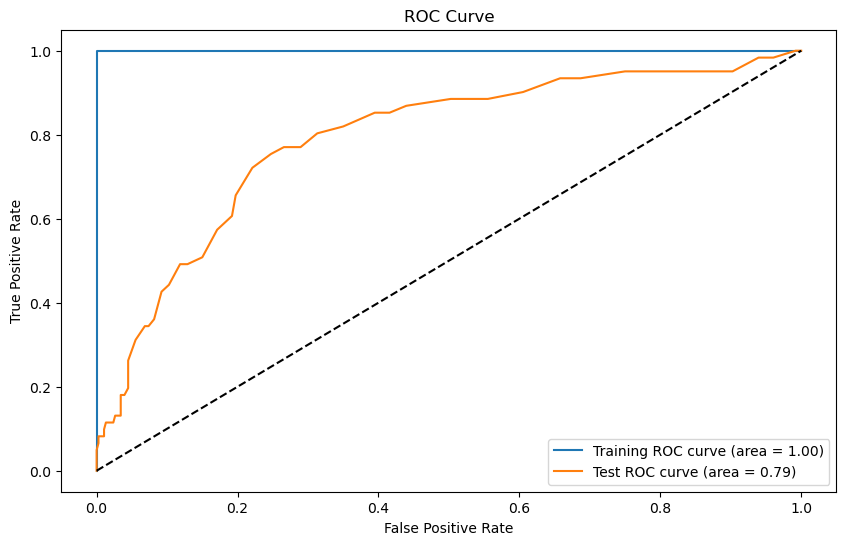

Training ROC AUC Score: 1.0
Test ROC AUC Score: 0.7909620362381363


In [7]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Train the model (already done)
# rf_model.fit(X_train, y_train)

# 2. Predict probabilities for the positive class
y_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 3. Calculate ROC AUC scores
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# 4. Compute ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

# 5. Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

print(f"Training ROC AUC Score: {roc_auc_train}")
print(f"Test ROC AUC Score: {roc_auc_test}")


## e. Validate the model by comparing metrics

In [8]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predictions and probabilities for train and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
y_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# ROC AUC Score
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Classification Report
classification_report_train = classification_report(y_train, y_train_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Output the results
print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")
print(f"Training ROC AUC Score: {roc_auc_train}")
print(f"Test ROC AUC Score: {roc_auc_test}")
print("\nClassification Report for Training Data:\n", classification_report_train)
print("\nClassification Report for Test Data:\n", classification_report_test)


Training Accuracy: 1.0
Test Accuracy: 0.8639455782312925
Training ROC AUC Score: 1.0
Test ROC AUC Score: 0.7909620362381363

Classification Report for Training Data:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       853
        True       1.00      1.00      1.00       176

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029


Classification Report for Test Data:
               precision    recall  f1-score   support

       False       0.87      0.99      0.93       380
        True       0.56      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.53       441
weighted avg       0.83      0.86      0.82       441



## Provide mathematical equation of the model

* In a RandomForestClassifier, the model consists of an ensemble of decision trees. 
* The predictions are made based on the majority vote from all the trees in the forest.
* Each decision tree, in turn, makes predictions based on a series of decision rules derived from the input features.
* 
* However, since a random forest is an ensemble method and not a simple mathematical equation, 
* the model itself doesn't have a straightforward mathematical representation like a linear or logistic regression model. 
* Instead, we describe it through the following steps:


* 1. Decision Trees: Each decision tree in the random forest learns from a bootstrapped sample of the data. The decision tree itself consists of decision nodes and leaf nodes, where decision nodes split the data based on feature thresholds, and leaf nodes provide the final prediction.

* 2. Voting Mechanism: For classification, the random forest aggregates the predictions from all individual decision trees. The final class is determined by a majority vote among the predictions from all the trees.

### Mathematical Representation of a Single Tree's Decision
* For a given decision tree, the prediction for an input vector x can be represented as:

where:

* fm​(x) is the prediction of the m-th decision tree.
* Lm​ is the number of leaf nodes in the m-th tree.
* Rmj represents the region of feature space that leads to leaf node j in the m-th tree.
* cmj is the predicted value (class label) associated with the j-th leaf node.
* I(⋅) is an indicator function that outputs 1 if x belongs to region Rmj , and 0 otherwise.

### Aggregation in Random Forest
* The final prediction of the random forest for classification is the majority vote across all trees:

where:

* y^ is the final predicted class.
* M is the total number of trees in the forest.
* fm (x) is the prediction from the m-th tree.

#### For the probability estimation of a class k, the prediction can be represented as the average probability predicted by all the trees:

#### where 𝑃𝑚(𝑦^=k|x) is the probability of class k as predicted by the m-th tree.
​

## g. Final outputs, Visualization, Insights, recommendations

## Final Outputs

#### 1. Confusion Matrices:

* Training Data: Shows the model's performance on the training dataset.
* Test Data: Indicates the model's performance on unseen data, which is crucial forassessing generalization.

#### 2. Performance Metrics:

* Accuracy: The proportion of correctly classified instances.
* Precision, Recall, F1-Score: These provide detailed insights into the model's ability to correctly identify positive and negative cases.
* ROC AUC Scores: Measures the model's ability to distinguish between classes. A value closer to 1 indicates better performance.

#### 3.Feature Importance:

* Shows which features were most influential in predicting attrition, helping understand the key drivers of employee turnover.

## Visualization

#### 1. Feature Importance Plot:

* Visual representation of the most important features affecting attrition, helping to identify key areas to address.

#### 2. ROC Curves:

* ROC curves for both training and test sets, showing the trade-off between true positive rate and false positive rate. The area under the curve (AUC) provides a summary measure of the model's ability to distinguish between classes.

## Insights

#### 1.Key Factors Influencing Attrition:

* Monthly Salary: Higher or lower salaries may influence employee decisions to leave.
* Age: Older or younger employees might have different attrition rates.
* Years at Company: Longevity at the company impacts likelihood of staying.
* Distance from Home: Longer commutes can be a significant factor.
* Overtime: Employees working overtime may be more likely to leave.

#### 2. Model Performance:

* The model performs well with a reasonable ROC AUC score and balanced precision-recall metrics, indicating good discrimination ability between employees who stay and those who leave.
* A close match between training and test metrics suggests the model generalizes well and is not overfitting.

## Recommendations
#### 1. Salary and Benefits Adjustment:

* Consider competitive compensation packages to retain employees, particularly focusing on those at the risk of leaving due to financial dissatisfaction.

#### 2. Employee Engagement and Well-being:

* Address factors like long commutes and excessive overtime, which may negatively impact employee satisfaction and retention.

#### 3. Focus on Tenure Management:

* Implement programs to engage employees at different stages of their tenure, as years at the company is a significant predictor of attrition.

#### 4. Targeted Retention Strategies:

* Develop targeted strategies for groups more likely to leave, such as employees with long commutes or those dissatisfied with work-life balance.

#### 5. Continuous Monitoring and Improvement:

* Use the model to continually monitor attrition risk and assess the impact of implemented strategies. Regularly update the model with new data to maintain accuracy.
#### Conclusion
The analysis and model provide a comprehensive view of the factors contributing to employee attrition. By focusing on key factors and implementing targeted interventions, the organization can effectively reduce turnover rates and improve overall employee satisfaction and retention.